<a href="https://colab.research.google.com/github/celikn/GEE_Repository/blob/main/ChangeDetection_TorchGeo_OSCD_Dataset_20220411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Modified Source: https://www.kaggle.com/soumikrakshit/onera-satellite-change-detection-dataset/code

In [ ]:
!pip install segmentation-models-pytorch -q

     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 376 kB 18.7 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 


# Using OSCD dataset from torchgeo


In [ ]:
!pip install torchgeo

In [ ]:
from typing import Dict, List

import kornia.augmentation as K
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
from torch.utils.data import DataLoader


from torchgeo.datasets import OSCD
import torchgeo.datasets.utils
from torchgeo.samplers import RandomGeoSampler



In [7]:
dataset = OSCD(root="/content/torchgeotest", split="train", download=True, checksum=True)


In [ ]:
## List file from path 
top="/content/torchgeotest/Onera Satellite Change Detection dataset - Train Labels"
import os
foldernames=[]
for root, dirs, files in os.walk(top, topdown=False):
    for name in dirs:
        print (os.path.join(root, name))
        foldernames.append(name)
foldernames        

In [ ]:
listOfCities= ['dubai',
 'chongqing',
 'cupertino',
 'beihai',
 'nantes',
 'norcia',
 'valencia',
 'rennes',
 'brasilia',
 'pisa',
 'abudhabi',
 'bercy',
 'hongkong',
 'beirut',
 'lasvegas',
 'rio',
 'paris',
 'mumbai',
 'milano',
 'saclay_w',
 'saclay_e',
 'montpellier',
 'bordeaux',
 'aguasclaras']

In [ ]:
listOfTestCities=['dubai',
 'chongqing',
 'norcia',
 'valencia',
 'brasilia',
 'lasvegas',
 'rio',
 'milano',
 'saclay_w',
 'montpellier']

In [9]:
listOfTrainCities=['cupertino',
 'beihai',
 'nantes',
 'rennes',
 'pisa',
 'abudhabi',
 'bercy',
 'hongkong',
 'beirut',
 'paris',
 'mumbai',
 'saclay_e',
 'bordeaux',
 'aguasclaras']

In [22]:
##RGB Version 
# specifying input path to read images
input_path = "/content/torchgeotest/Onera Satellite Change Detection dataset - Images"

img1 = []   # creating list of imagery paths for first set of images 
img2 = []   # creating list of imagery paths for second set of images
label = []  # creating list of change mask paths for the images

for city in listOfTrainCities:
    img1.append(input_path +"/"+ city + "/pair/" + "img1.png")
    img2.append(input_path +"/"+ city + "/pair/" + "img2.png")
    label.append(f"/content/torchgeotest/Onera Satellite Change Detection dataset - Train Labels/{city}/cm/cm.png")


In [18]:
##ALL Band Version 
# specifying input path to read images
input_path = "/content/torchgeotest/Onera Satellite Change Detection dataset - Images"

img1 = []   # creating list of imagery paths for first set of images 
img2 = []   # creating list of imagery paths for second set of images
label = []  # creating list of change mask paths for the images

## https://github.com/sentinel-hub/custom-scripts/tree/master/sentinel-2
##https://github.com/sentinel-hub/custom-scripts#sentinel-2 

for city in listOfTrainCities:
  for band in ["B02","B03","B04","B08","B12"]:
    img1.append(input_path +"/"+ city + "/imgs_1_rect/" + band+ ".tif")
    img2.append(input_path +"/"+ city + "/imgs_2_rect/" + band+ ".tif" )
    label.append(f"/content/torchgeotest/Onera Satellite Change Detection dataset - Train Labels/{city}/cm/cm.png")


(408, 390, 2)


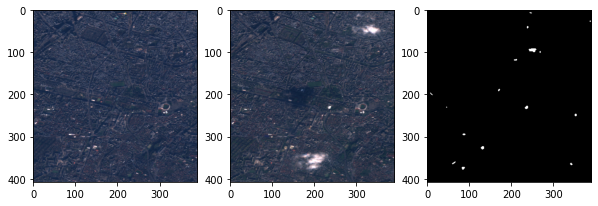

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sample = np.random.randint(0,13) # generate a random number    
im1 = Image.open(img1[sample])
im2 = Image.open(img2[sample])
lab = Image.open(label[sample]).convert('LA')
print(np.array(lab).shape)
fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(lab)

In [ ]:

# Below code to divide the whole images into patches of 64X64 
path1 = []
path2 = []
target = []
start_row = []
end_row = []
start_col = []
end_col = []

## takes path of an image and return 64pixel indexs
def arrayOfRowColumns(im1):
    im1content = Image.open(im1)
    im1shape=np.array(im1content).shape
    print(im1shape) ##number of rows and column 
    arrayOf64forImRow=[i for i in range(0,im1shape[0]) if ((i%64==0) and (i+64<im1shape[0]))]
    arrayOf64forImCol=[i for i in range(0,im1shape[1]) if ((i%64==0) and (i+64<im1shape[1]))]
    print(arrayOf64forImRow)
    print(arrayOf64forImCol)

    arrayOf64forImRow=[0,64,128,192,256,320,384,448]
    arrayOf64forImCol=[0,64,128,192,256,320,384,448]
    return arrayOf64forImRow,arrayOf64forImCol


for im1,im2,lab in zip(img1,img2,label):
    rowInds,colInds = arrayOfRowColumns(im1)
    print(rowInds)
    print (colInds)
    for row in rowInds:
        for col in colInds:
            row_start = row
            row_end = row + 64
            col_start = col
            col_end = col + 64
            
            path1.append(im1)
            path2.append(im2)
            target.append(lab)
            
            start_row.append(row_start)
            end_row.append(row_end)
            
            start_col.append(col_start)
            end_col.append(col_end)
            
df = pd.DataFrame({"path1":path1,"path2":path2,"target":target,"start_row":start_row,"end_row":end_row,"start_col":start_col,"end_col":end_col})



In [29]:
df


,path1,path2,target,start_row,end_row,start_col,end_col
0,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,0,64,0,64
1,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,0,64,64,128
2,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,0,64,128,192
3,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,0,64,192,256
4,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,0,64,256,320
...,...,...,...,...,...,...,...
891,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,448,512,192,256
892,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,448,512,256,320
893,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,448,512,320,384
894,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,/content/torchgeotest/Onera Satellite Change D...,448,512,384,448


In [30]:
#Python dataset class to be used for generating images and labels for training the model

class ChangeDatasetRGB():
    def __init__(self,df):
        self.df = df
        
    def __len__(self):
        return (len(self.df))
    
    def __getitem__(self,item):
        im1 = Image.open(self.df.loc[item,"path1"])
        im1 = np.array(im1.resize((512,512))) / 255 # resizing the image to 512X512
        im2 = Image.open(self.df.loc[item,"path2"])
        im2 = np.array(im2.resize((512,512))) / 255 # resizing the image to 512X512
        target = Image.open(self.df.loc[item,"target"]).convert("RGB")
        target = np.array(target.resize((512,512))) # resizing the mask to 512X512
        target = (np.mean(target,axis=-1) > 0.5).astype(np.uint8)
        start_row = self.df.loc[item,"start_row"]
        end_row = self.df.loc[item,"end_row"]
        start_col = self.df.loc[item,"start_col"]
        end_col = self.df.loc[item,"end_col"]
        
        # read a 64X64 patch from the base image1
        im1 = torch.tensor(im1[start_row:end_row,start_col:end_col,:].transpose(2,1,0),dtype=torch.float)
          # read a 64X64 patch from the base image2
        im2 = torch.tensor(im2[start_row:end_row,start_col:end_col,:].transpose(2,1,0),dtype=torch.float)
          # read a 64X64 patch from the base change mask
        target = torch.tensor(target[start_row:end_row,start_col:end_col],dtype=torch.long)
        
        return (im1,im2,target)

In [ ]:
#Python dataset class to be used for generating images and labels for training the model

class ChangeDatasetALL():
    def __init__(self,df):
        self.df = df
        
    def __len__(self):
        return (len(self.df))
    
    def __getitem__(self,item):
        im1 = Image.open(self.df.loc[item,"path1"]).convert("RGB")
        im1 = (np.mean(im1,axis=-1) > 0.5).astype(np.uint8)

        im1 = np.array(im1.resize((512,512))) / 255 # resizing the image to 512X512
        im2 = Image.open(self.df.loc[item,"path2"]).convert("RGB")
        im2 = np.array(im2.resize((512,512))) / 255 # resizing the image to 512X512
        target = Image.open(self.df.loc[item,"target"]).convert("RGB")
        target = np.array(target.resize((512,512))) # resizing the mask to 512X512
        target = (np.mean(target,axis=-1) > 0.5).astype(np.uint8)
        start_row = self.df.loc[item,"start_row"]
        end_row = self.df.loc[item,"end_row"]
        start_col = self.df.loc[item,"start_col"]
        end_col = self.df.loc[item,"end_col"]
        
        # read a 64X64 patch from the base image1
        ##im1 = torch.tensor(im1[start_row:end_row,start_col:end_col],dtype=torch.float)
        im1 = torch.tensor(im1[start_row:end_row,start_col:end_col,:].transpose(2,1,0),dtype=torch.float)

          # read a 64X64 patch from the base image2
        ##im2 = torch.tensor(im2[start_row:end_row,start_col:end_col],dtype=torch.float)
        im2 = torch.tensor(im2[start_row:end_row,start_col:end_col,:].transpose(2,1,0),dtype=torch.float)

          # read a 64X64 patch from the base change mask
        target = torch.tensor(target[start_row:end_row,start_col:end_col],dtype=torch.long)
        
        return (im1,im2,target)

In [31]:
## Shpae of image list
df.shape[0]

896

In [32]:
## Create Dataset from Images
dataset = ChangeDatasetRGB(df)

In [33]:
# Seperate data indicess randomly as train and validation 
chosen_idx = np.random.choice(df.shape[0], replace=False, size=round(df.shape[0]/2))
not_chosen_idx = np.setdiff1d(df.index.to_numpy(), chosen_idx)

df_trimmed = df.iloc[chosen_idx]
df_notTrimmed=df.iloc[not_chosen_idx]

train_ds = ChangeDatasetRGB(df_trimmed.reset_index(drop=True))  # train dataset
val_ds = ChangeDatasetRGB(df_notTrimmed.reset_index(drop=True)) # validation dataset



In [ ]:
train_ds = ChangeDatasetRGB(df[:700])  # train dataset
val_ds = ChangeDatasetRGB(df[700:].reset_index(drop=True)) # validation dataset

In [ ]:
df_trimmed.reset_index(drop=True)

In [ ]:
df.iloc[555]

path1        /content/torchgeotest/Onera Satellite Change D...
path2        /content/torchgeotest/Onera Satellite Change D...
target       /content/torchgeotest/Onera Satellite Change D...
start_row                                                  320
end_row                                                    384
start_col                                                  192
end_col                                                    256
Name: 555, dtype: object

In [34]:
## Show shape of one sample size for RGB
sample = np.random.randint(0,700) # generate a random number
im1,im2,target = train_ds[sample] # read a random sample 
im1.shape,im2.shape,target.shape,sample  # check shape

df.iloc[sample]

path1        /content/torchgeotest/Onera Satellite Change D...
path2        /content/torchgeotest/Onera Satellite Change D...
target       /content/torchgeotest/Onera Satellite Change D...
start_row                                                  192
end_row                                                    256
start_col                                                  320
end_col                                                    384
Name: 157, dtype: object

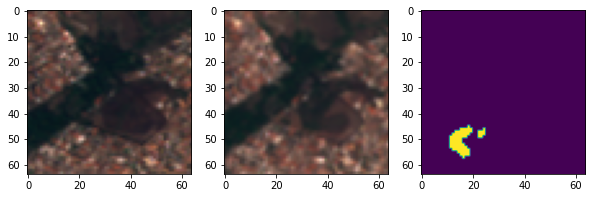

In [35]:
# plot the image1, image2 and the change mask

fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(im1.numpy().transpose(1,2,0))
ax[1].imshow(im2.numpy().transpose(1,2,0))
ax[2].imshow(target.numpy())

In [36]:
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.encoders import get_preprocessing_fn
model = smp.Unet('resnet34', encoder_depth=3,decoder_channels=(64, 64, 16)) # build a base model based on Unet architecture with a resnet34 encoder 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [37]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds,batch_size=256, shuffle=True)  # train dataset to train dataloader
val_dl = DataLoader(val_ds,batch_size=256, shuffle=False)  # valid dataset to valid dataloader

In [38]:
# ChangeNet model

class ChangeNet(nn.Module):
    def __init__(self,model):
        super().__init__()
        self.encoder = model.encoder  #model encoder
        self.decoder = model.decoder  #model decoder
        self.head = model.segmentation_head  #segmentation head for generation of change mask
        
    def forward(self,x1,x2):
        enc1 = self.encoder(x1)  # get latent features of image1
        enc2 = self.encoder(x2)  # get latent features of image2
        encoder_out = []
        for i in range(len(enc1)):
            encoder_out.append(torch.add(enc1[i],enc2[i])) # Add the latent features and append them to a list
        decoder_out = self.decoder(*encoder_out) # Pass the latent features through a decoder
        out = self.head(decoder_out) # Pass the decoder output through the segmentation head to generate change mask
        return out

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')  #Training on gpu if available

In [40]:
change_model = ChangeNet(model).to(device) #migrating model to device

from tqdm.notebook import tqdm ## progress bar

criterion = torch.nn.BCEWithLogitsLoss().to(device)   #loss function is BCE loss since it is binary classification
optimizer = torch.optim.Adam(change_model.parameters(), lr=0.0001)

for epoch in tqdm(range(10)):  # Number of epochs = 5
    
    epoch_loss = []
    # Iterate over data.
        
    change_model.train() # setting model state to train
    for x1,x2,target in tqdm(train_dl,total=len(train_dl)):
        x1 = x1.to(device)  #migrating inputs to device
        x2 = x2.to(device)  #migrating inputs to device
        target = target.to(device)  #migrating inputs to device
                
        # zero the parameter gradients
        optimizer.zero_grad()   #resetting the optimizer

        # forward
        outputs = change_model(x1,x2)  # generating model predictions
        loss = criterion(outputs.squeeze(), target.float()) # evaluating loss

        # backward + optimize only if in training phase
        
        loss.backward()  # calculating gradients
        optimizer.step()  # using optimizer to recalculate parameters
        epoch_loss.append(loss.item())
    
    print(f"Epoch {epoch}, Loss:",np.array(epoch_loss).mean())

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 0, Loss: 0.592883288860321


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1, Loss: 0.5758634507656097


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5622977912425995


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 3, Loss: 0.5505388081073761


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 4, Loss: 0.5397431254386902


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 5, Loss: 0.5291884243488312


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 6, Loss: 0.5191922187805176


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 7, Loss: 0.5095551609992981


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 8, Loss: 0.5003826767206192


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 9, Loss: 0.49138733744621277


In [41]:
PATH="/content/drive/MyDrive/TrainedModels/pytorch_change_detection_nb_v2"
torch.save(change_model.state_dict(), PATH)

In [42]:
change_model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

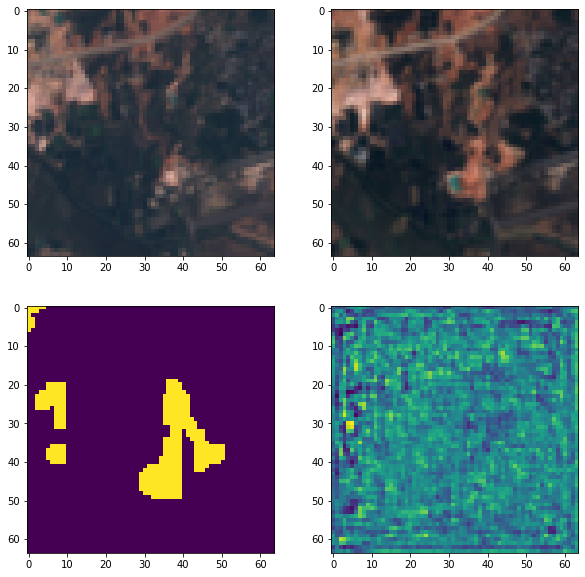

In [58]:
change_model.eval()  #setting model to eval for generating predictions

s = 55 # sample - random

with torch.no_grad():
    #generating prediction & passing the prediction through torch.sigmoid 
    pred_mask = (torch.sigmoid(change_model(val_ds[s][0].unsqueeze(dim=0).to(device),val_ds[s][1].unsqueeze(dim=0).to(device))).squeeze()).detach().cpu().numpy()  


# displaying sample image1, sample image2, sample ground truth mask, and predicted mask    
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(val_ds[s][0].numpy().transpose(1,2,0))
ax[0][1].imshow(val_ds[s][1].numpy().transpose(1,2,0))
ax[1][0].imshow(val_ds[s][2].numpy().transpose(1,0))
ax[1][1].imshow(pred_mask)

In [59]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)
dataloader = iter(dataloader)
print(f"Number of images in dataset: {len(dataset)}")
print(f"Dataset: {dataset}")


Number of images in dataset: 896
Dataset: <__main__.ChangeDatasetRGB object at 0x7f621b9f5910>


In [ ]:
##Sentinel Data

mins = [1013.0, 676.0, 448.0, 247.0, 269.0, 253.0, 243.0, 189.0, 61.0, 4.0, 33.0, 11.0, 186.0]
maxs = [2309.0, 4543.05, 4720.2, 5293.05, 3902.05, 4473.0, 5447.0, 5948.05, 1829.0, 23.0, 4894.05, 4076.05, 5846.0]
bands = {
    "B1": "Coastal Aerosol",
    "B2": "Blue",
    "B3": "Green",
    "B4": "Red",
    "B5": "Vegetation Red Edge 1",
    "B6": "Vegetation Red Edge 2",
    "B7": "Vegetation Red Edge 3",
    "B8": "NIR 1",
    "B8A": "NIR 2",
    "B9": "Water Vapour",
    "B10": "SWIR 1",
    "B11": "SWIR 2",
    "B12": "SWIR 3"
}